In [92]:
#Schwefel's function
def schwefel(x):
    return 418.9829*len(x[0]) - np.sum(x*np.sin(np.sqrt(np.abs(x))),axis = 1)
def schwefel_gradient(x):
    indices = np.where(x==0)
    x[indices] = 0.00001
    return -(np.sin(np.sqrt(np.abs(x)))+(x*np.cos(np.sqrt(np.abs(x)))*(0.5/np.sqrt(np.abs(x)))*(np.sign(x))))
def schwefel_hessian(x):
    e = 1e-4
    dd = (schwefel_gradient(x+e)-schwefel_gradient(x-e))/e
    hessian=np.zeros((len(x[0]),len(x[0])))
    for i in range(len(hessian)):
        hessian[i,i] = (schwefel_gradient(x[:,i]+e)-schwefel_gradient(x[:,i]-e))/(2.0*e)
    return hessian

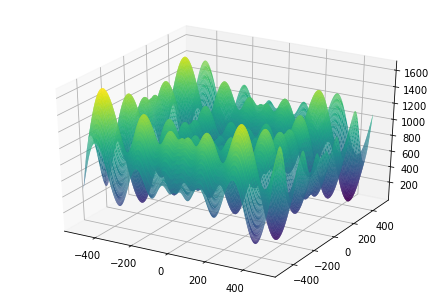

In [127]:
def Newton(obj,grad,hess, x0):
    e = np.inf
    while e > 0.0000001:
        gradient = grad(x0)
        e = np.linalg.norm(gradient)
        hessian  = hess(x0)
        gamma = np.linalg.solve(hessian,-gradient[0])
        x0 += gamma
        print("current position: ",x0,"epsilon: ",e)
    return x0,obj(x0),np.linalg.eig(hessian)[0]

In [129]:

pos, feval, eig = Newton(schwefel,schwefel_gradient,schwefel_hessian,np.array([[200.0,250.0]]))
print(pos,feval, eig)

current position:  [[ 203.85539959 -122.78896924]] epsilon:  8.024904530735771
current position:  [[ 203.81425458 -124.84309822]] epsilon:  0.5236287214487646
current position:  [[ 203.81425265 -124.82935676]] epsilon:  0.0035443288784487025
current position:  [[ 203.81425265 -124.82935642]] epsilon:  8.812007079583857e-08
[[ 203.81425265 -124.82935642]] [513.2464086] [0.25487078 0.25791668]


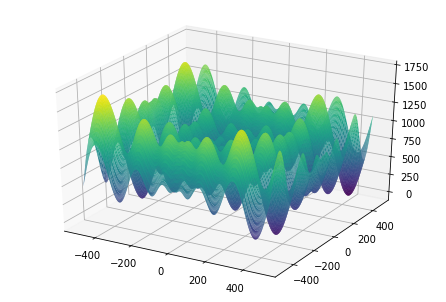

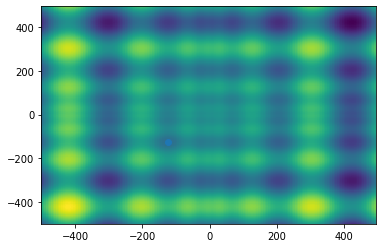

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-500, 500, 5)
Y = np.arange(-500, 500, 5)
X, Y = np.meshgrid(X, Y)
x = np.empty((len(X)**2,2))
index = 0 
for i in range(len(X)):
    for j in range(len(Y)):
        x[index,0] = X[i,j]
        x[index,1] = Y[i,j]
        index += 1
b = schwefel(x)
#g = schwefel_gradient(x)
s = np.empty((X.shape))
sg= np.empty((X.shape)) 
index = 0 
for i in range(len(X)):
    for j in range(len(Y)):
        s[i,j] = b[index]
        sg[i,j]= g[index][0]
        index += 1

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, s, rstride=1, cstride=1, cmap=cm.viridis)
ax.scatter(pos[0,0], pos[0,1], feval, linewidths =20)
plt.show()
plt.pcolormesh(X, Y, s,cmap=cm.viridis)
plt.scatter(pos[0,0], pos[0,1])